# Ejemplo de Clasificación

### Instalación de bibliotecas necesarias para el análisis de los datos

In [11]:
#
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

### Cargamos la base de datos

In [12]:
# 
df = pd.read_excel('Default.xlsx')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [13]:
df.default.factorize()

(array([0, 0, 0, ..., 0, 0, 0]), Index(['No', 'Yes'], dtype='object'))

In [14]:
# We factorize, the function returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 

df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head()

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0


### Gráficas

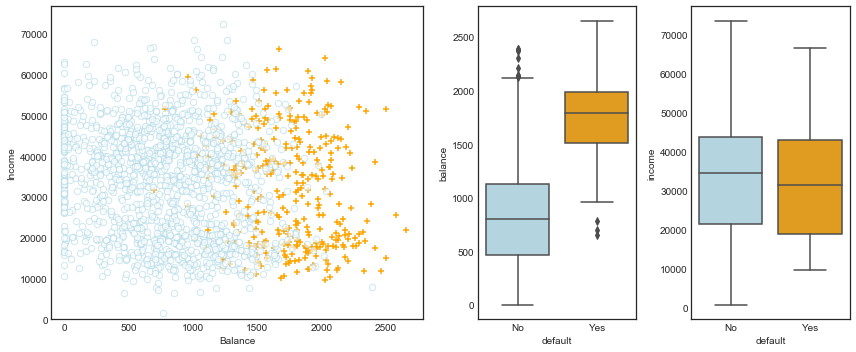

In [15]:
# Configuramos gráfica
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Tomamos una fracción de los datos donde default es 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)

# Tomamos todos lo valores donde los datos muestran que default es 'yes'
df_yes = df[df.default2 == 1]

df_ = df_no.append(df_yes)

# Graficos de dispersión
ax1.scatter(df_[df_.default == 'Yes'].balance, 
            df_[df_.default == 'Yes'].income, 
            s = 40, c = 'orange', marker = '+',
            linewidths = 1)

ax1.scatter(df_[df_.default == 'No'].balance, 
            df_[df_.default == 'No'].income, 
            s = 40, marker = 'o', linewidths='1',
            edgecolors='lightblue', facecolors='white', 
            alpha=.6)

ax1.set_ylim(ymin = 0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

# Graficos Box-Plot
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data = df, orient= 'v', ax = ax2, palette = c_palette)
sns.boxplot('default', 'income', data = df, orient = 'v', ax = ax3, palette = c_palette)
gs.tight_layout(plt.gcf())

### Regresión Logística

In [16]:
# Creamos nuestra variable X e Y -- datos de entrenamiennto
X_train = df.balance.values.reshape(-1,1) 
y = df.default2

# Creamos nuestro set de datos de prueba
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

In [17]:
# Regresión

# Definimos el modelo
clf = skl_lm.LogisticRegression(solver = 'newton-cg')

# Estimamos el Modelo
clf.fit(X_train, y)

# Calculamos la probabilidad en el set de entrenamiento
prob = clf.predict_proba(X_test)

/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


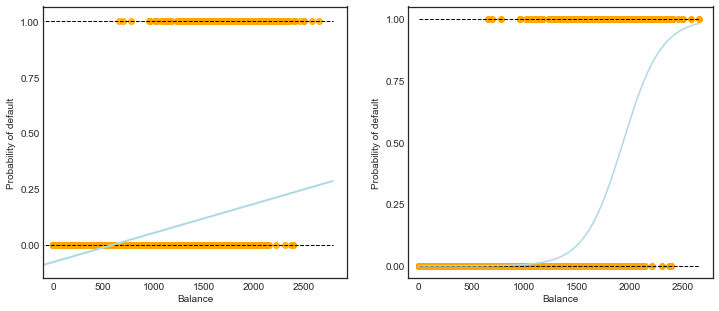

In [18]:
# Gráfica
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(df.balance, df.default2, order = 1, ci = None,
            scatter_kws = {'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax = ax1)

# Right plot
ax2.scatter(X_train, y, color = 'orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

#### Estimación del modelo

In [19]:
# 
clf = skl_lm.LogisticRegression(solver='newton-cg')

X_train = df.balance.values.reshape(-1,1)
clf.fit(X_train, y)

print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

coefficients:  [[0.00549892]]
intercept : [-10.65133006]


/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [20]:
X_train = sm.add_constant(df.balance)
est = sm.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [22]:
print(est.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.4534
Time:                        08:56:56   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006

Possibly complete quasi-separation: A fraction 0.13